In [1]:
import random

import pandas

from tcp_fits import Call

from tcp_fits.profiles import TypeProfile

In [2]:
def random_ints_sample(size, max_abs=10000):
    return random.sample(range(-max_abs, max_abs), k=size)

In [3]:
size_range = range(1500, 2000)
profile = TypeProfile(
    [Call('set', random_ints_sample(size)) for size in size_range], Call('pop'), Call('copy'),
    index=pandas.Index(size_range, name='List length'), loops=10, overfit=-6, fraction=0.9)

In [4]:
profile.fit_all_with(Call('polynomial', *[1, 2]))

In [5]:
profile.best_fits

,fit,degree,cost
pop,(0.0317 ± 0.0026) + (0.0000459 ± 0.0000015)x,1,0.000013
copy,(0.0313 ± 0.0059) + (0.0000729 ± 0.0000033)x,1,0.000029


In [7]:
assert list(profile.best_fits.degree) == [1]*2

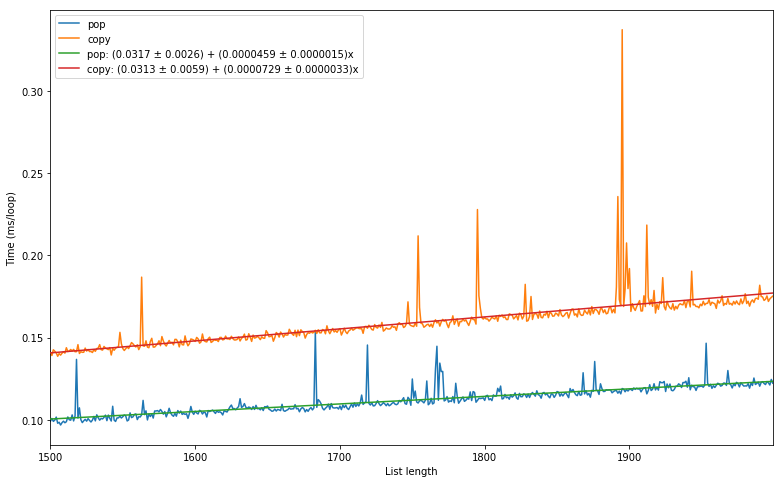

In [8]:
profile.show()